## Evaluation

Exercise 1: Laing-Chow

1.)
>Implement function laing_chow - <span style="color:red">2/2</span><br>
>Run simulation and reproduce figure - <span style="color:red">1/1</span><br>

2.)
>Implement function dominance_durations - <span style="color:red">1/1</span><br>
>Compute dominance durations - <span style="color:red">1/1</span><br>
>Discuss differences to the analytical result - <span style="color:red">0.5/1</span><br>

3.)
>Drive both populations with higher inputs - <span style="color:red">1/1</span><br>
>Find an intermediate setting - <span style="color:red">1/1</span><br>
>Discussion: Still fitting analytical predictions? Interpretation? - <span style="color:red">0.5/1</span><br>



Exercise 2: Moreno-Bote

1.)
>Why not use odeint? - <span style="color:red">1/1</span><br>

2.)
>Implement function euler_maruyama - <span style="color:red">1/2 *(There is just one sample of the random variable dW applied to all variables.)*</span><br>
>Test on laing_chow - <span style="color:red">1/1</span><br>

3.)
>Simulate Wiener and Ornstein-Uhlenbeck processes - <span style="color:red">2/2</span><br>
>Discuss - <span style="color:red">0/2</span><br>

4.)
>Implement f_moreno_bote  and g_moreno_bote- <span style="color:red">3/3</span><br>

5.)
>Simulate - <span style="color:red">1/1</span><br>
>Dominance durations/histogram/mean - <span style="color:red">1/1</span><br>

<span style="color:red">*Unfortunately I cannot give more points in the following. Since in your implementation both populations are always driven with the same noise process, your results look different from what they should look like.*</span><br>
6.)
>Change $\gamma$ and resimulate - <span style="color:red">0/1</span><br>
>Plot and discuss - <span style="color:red">0/1</span><br>

7.)
>Find a parameter setting that reproduces the orginal mean - <span style="color:red">0/1</span><br>
>Plot and discuss - <span style="color:red">0/1</span><br>

Total <span style="color:red">18/26</span><br>

# MHBF PT 4
### Lukas Dippold and Evert de Man

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate

### Exercise 1

#### (1)

In [2]:
def laing_chow(x0,t,I1,I2):
    alpha = 0.2
    beta = 0.4
    sigma = 0.4
    tau = 20
    g1 = 1.
    g2 = 1.

    u1 = x0[0]
    a1 = x0[1]
    u2 = x0[2]
    a2 = x0[3]
    
    dy =    [-u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1),
            (-a1 + sigma*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1))/tau,    
            -u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1),
            (-a2 + sigma*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1))/tau]
    
    return dy

In [3]:
#  x0 contains: u1 = 1, a1 = 0.1 u2 = 0, a2 = 0.25
x0 = np.array([1., 0.1, 0., 0.25])
t = np.arange(0,500,0.01)


I1 = 0.43
I2 = 0.5

sol = integrate.odeint(laing_chow, x0, t, args=(I1,I2))

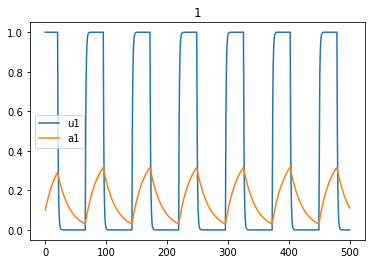

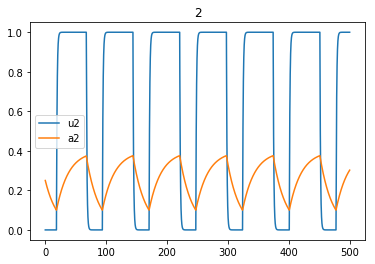

In [4]:
plt.plot(t,sol[:,0],label ='u1')
plt.plot(t,sol[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,sol[:,2],label ='u2')
plt.plot(t,sol[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

#### (2)

In [5]:
def dominance_durations(x1, x2, t):
    buf = np.zeros(t.shape)
    buf = x1 > x2
    durations = []
    
    start = t[0]
    end = t[0]
    for i in range(1,t.shape[0]): 
        if buf[i] == buf[i-1]:    #that means we have dominance continuing
            end = t[i]
        
        else:
            end = t[i]
            durations.append(end-start)
            start = t[i]
            

    return durations

In [6]:
dom = dominance_durations(sol[:,0],sol[:,2],t)

In [7]:
alpha = 0.2
beta = 0.4
sigma = 0.4
tau = 20
g1 = 1.
g2 = 1.

T1 = -tau*np.log((I2-beta)/(beta+sigma-I1))
T2 = -tau*np.log((I1-beta)/(beta+sigma-I2))

print('T1 analytical solution: ',T1)
print('T2 analytical solution: ',T2)
print('Average model solution for T1 ', np.mean(dom[::2]))
print('Average model solution for T2 ', np.mean(dom[1::2]))

T1 analytical solution:  26.166656393
T2 analytical solution:  46.0517018599
Average model solution for T1  26.9257142857
Average model solution for T2  48.4683333333


Why are the dominance durations different from the analytical T 1 (eq. 9) in the paper?
- differential equations (5) & (6) in the paper are not included in our laing_chow function

#### (3)


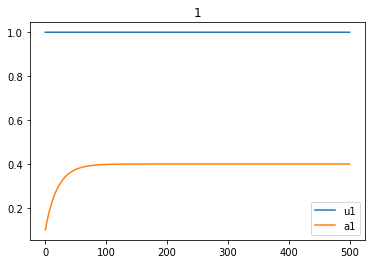

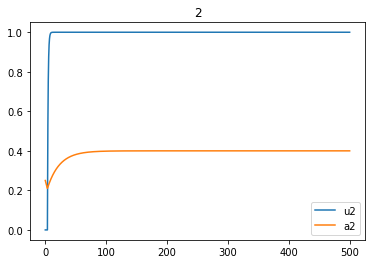

In [8]:
#simulation: I1 = 0.43, I2 = 0.5
b = -alpha+beta+sigma
I1new = b+0.021
I2new = b+0.01

solNew = integrate.odeint(laing_chow, x0, t, args=(I1new,I2new))

plt.plot(t,solNew[:,0],label ='u1')
plt.plot(t,solNew[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,solNew[:,2],label ='u2')
plt.plot(t,solNew[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

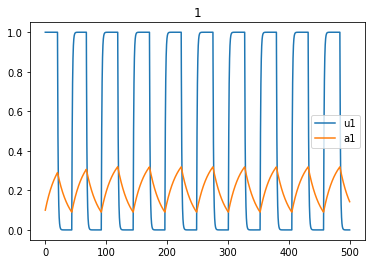

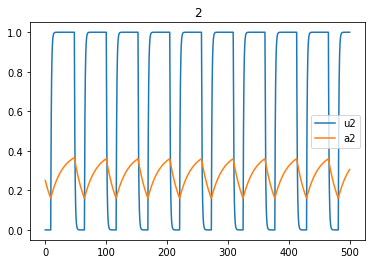

T1 analytical solution:  13.2279696449
T2 analytical solution:  19.6165850602
Average model solution for T1  26.9257142857
Average model solution for T2  48.4683333333


In [9]:
#simulation: I1 = 0.43, I2 = 0.5
b = -alpha+beta+sigma
I1new = I1 + 0.06
I2new = I2 + 0.06

solNew2 = integrate.odeint(laing_chow, x0, t, args=(I1new,I2new))

plt.plot(t,solNew2[:,0],label ='u1')
plt.plot(t,solNew2[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,solNew2[:,2],label ='u2')
plt.plot(t,solNew2[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

dom2 = dominance_durations(solNew2[:,0],solNew2[:,2],t)
alpha = 0.2
beta = 0.4
sigma = 0.4
tau = 20
g1 = 1.
g2 = 1.

T1 = -tau*np.log((I2new-beta)/(beta+sigma-I1new))
T2 = -tau*np.log((I1new-beta)/(beta+sigma-I2new))

print('T1 analytical solution: ',T1)
print('T2 analytical solution: ',T2)
print('Average model solution for T1 ', np.mean(dom[::2]))
print('Average model solution for T2 ', np.mean(dom[1::2]))

In [10]:
print('mentioned threshold value: ', b)

mentioned threshold value:  0.6000000000000001


testing values for I1/I2 higher than the threshold value shows that both populations are active and oscillation stops. this doesnt fit to the experiments and neuronal activity as in that case binocular rivalry would not be there any more, but this is the thing we try to model.
For values in between threshold and initial I1/I2 value the populations are oscillating, but not agaist each other. this result is not fitting to the experimental results because when the two poputations oscillate, but this oscillations are not fitting together (one is acitve, the other one inactive), there is not the binacular rivalry, we want to model. The analytical solutions for dominance periods T are not fitting any more. the inputs have an area in which they can be adjusted so that the model works. 

In general comparision to the experimental results the chaotic dynamics of the spiking network ar not represented in the reduced model. 

### Exercise 2

#### (1)

We cannot use integrate.odeint here, because the new equation has a stochastic part, which cannot be simulated by integrate.odeint.

#### (2)

In [10]:
# New integration function 

def euler_maruyama(f_func, g_func, x_0, t, *args):
    y = np.zeros([len(x_0), len(t)])
    dt = t[1] - t[0]
    for i, t_val in enumerate(t):
        if t_val == 0:
            y[:, i] = x_0
        else:
            W = np.random.standard_normal(1)
            y[:, i] = (y[:, i-1] + np.array(f_func(y[:, i-1], t_val, args[0], args[1])) * dt 
                       + np.array(g_func(y[:, i-1], t_val)) * np.sqrt(dt) * W)
    return y

In [11]:
# Test the new function 
def g(x, t):
  return 0

# Set parameters
T_max = 500
dt = 0.1
t = np.arange(0, T_max + dt, dt)

y_0 = np.array([1, 0.1, 0, 0.25])
I1 = 0.43
I2 = 0.5

# Execute the new version
EM_results = euler_maruyama(laing_chow, g, y_0, t, I1, I2)

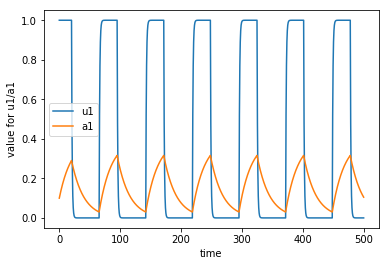

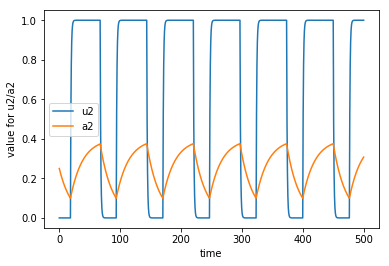

In [12]:
# Plot the results of the test 

plt.plot(t, EM_results[0, :], label = "u1")
plt.plot(t, EM_results[1, :], label = "a1")
plt.xlabel("time")
plt.ylabel("value for u1/a1")
plt.legend()
plt.show()

plt.plot(t, EM_results[2, :], label = "u2")
plt.plot(t, EM_results[3, :], label = "a2")
plt.xlabel("time")
plt.ylabel("value for u2/a2")
plt.legend()
plt.show()


The graphs are identical to the ones produces with integrate.odeint.

#### (3)

In [13]:
# 
def f_1(x, t, I1, I2):
    return 0
  
def f_2(x, t, I1, I2):
    return -x/tau

def g_1(x, t):
    return 1/tau

# Initialize
t_max = 5
dt = 0.01
t = np.arange(0, t_max + dt, dt)
y_0 = np.array([1, 0.1, 0, 0.25])

# First, with both f's and tau = 0.1
tau = 0.1

c_1 = euler_maruyama(f_1, g_1, [0], t, I1, I2)
c_2 = euler_maruyama(f_2, g_1, [0], t, I1, I2)

# Then, with tau = 1
tau = 1.

c_3 = euler_maruyama(f_1, g_1, [0], t, I1, I2)
c_4 = euler_maruyama(f_2, g_1, [0], t, I1, I2)

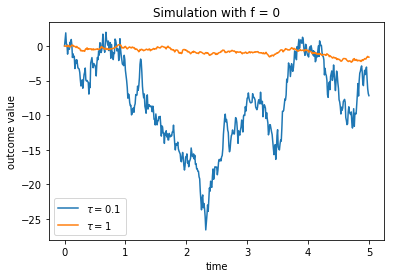

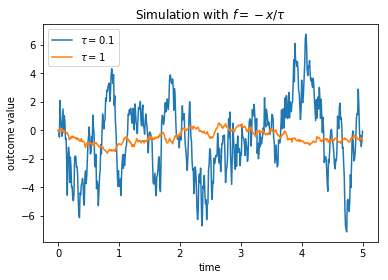

In [14]:
# Plot the results

plt.plot(t, c_1[0,:], label = r"$\tau = 0.1$")
plt.plot(t, c_3[0,:], label = r"$\tau = 1$")
plt.title("Simulation with f = 0")
plt.xlabel("time")
plt.ylabel("outcome value")
plt.legend()
plt.show()

plt.plot(t, c_2[0,:], label = r"$\tau = 0.1$")
plt.plot(t, c_4[0,:], label = r"$\tau = 1$")
plt.title(r"Simulation with $f = -x/\tau$")
plt.xlabel("time")
plt.ylabel("outcome value")
plt.legend()
plt.show()

Explanation about what we see here, TBC...

#### (4)

In [15]:
# Initialization 

t_max = 20 
dt = 0.01
t = np.arange(0, t_max + dt, dt)

y_0 = np.array([1, 0.01, 0, 0.04, 0, 0])

In [22]:
# Functions

def sigmoid(x, k = 0.05, theta = 0.1):
    y = 1 / (1 + np.exp(-(x-theta)/k))
    return y

def r_pool(r_A, r_B):
    phi = 0.5
    g_A = 0.05
    g_B = 0.05
    y = phi * (r_A + r_B) + g_A + g_B
    if y >= 0:
        return y
    else:
        return 0
      
def r_inh(r_pool, r_):
    eta = 0.5
    return np.power((r_pool + eta * r_),2)
  
def f_moreno_bote(Y, t):
    g_A = 0.05
    g_B = 0.05
    alpha = 0.75
    beta = 0.5
    gamma = 0.1
    phi = 0.5
    tau = 0.01
    tau_a = 2
    tau_b = 2
    tau_s = 0.1
    sigma = 0.03
    eta = 0.5
    theta = 0.1 
    k = 0.05
    
    r_A, r_B, alpha_A, alpha_B, n_A, n_B = Y
    r_p = r_pool(r_A, r_B)
    
    Y_2 = np.array([
        (1/tau) * (-r_A + sigmoid(alpha * r_A  - beta * r_inh(r_p, r_A) + g_A - alpha_A + n_A)),
        (1/tau) * (-r_B + sigmoid(alpha * r_B  - beta * r_inh(r_p, r_B) + g_B - alpha_B + n_B)), 
        (1/tau_a) * (-alpha_A + gamma * r_A),
        (1/tau_b) * (-alpha_B + gamma * r_B),
        (- n_A / tau_s),
        (- n_B / tau_s)   
        ])
    return Y_2

def g_moreno_bote(Y, t):
    sigma = 0.03
    tau_s = 0.1
    Y2 = np.array([
        0,
        0,
        0,
        0,
        sigma * np.sqrt(2/tau_s),
        sigma * np.sqrt(2/tau_s)
    ])
    return Y2
  
def euler_maruyama(f_func, g_func, x_0, t):
    y = np.zeros([len(x_0), len(t)])
    dt = t[1] - t[0]
    for i, t_val in enumerate(t):
        if t_val == 0:
            y[:, i] = x_0
        else:
            W = np.random.standard_normal(1)
            #W = np.random.normal(size=len(x_0))
            y[:, i] = (y[:, i-1] + np.array(f_func(y[:, i-1], t_val)) * dt 
                       + np.array(g_func(y[:, i-1], t_val)) * np.sqrt(dt) * W)
    return y

In [23]:
results = euler_maruyama(f_moreno_bote, g_moreno_bote, y_0, t)

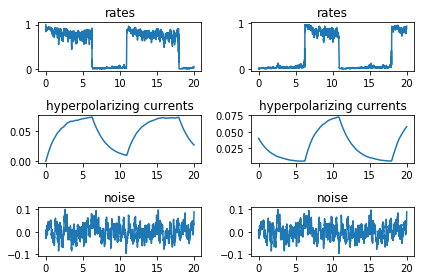

In [24]:
fig, axes = plt.subplots(3,2)

axes[0,0].plot(t, results[0,:])
axes[0,0].set_title('rates')

axes[0,1].plot(t, results[1,:])
axes[0,1].set_title('rates')

axes[1,0].plot(t, results[2,:])
axes[1,0].set_title('hyperpolarizing currents')

axes[1,1].plot(t, results[3,:])
axes[1,1].set_title('hyperpolarizing currents')

axes[2,0].plot(t, results[4,:])
axes[2,0].set_title('noise')
axes[2,1].plot(t, results[5,:])
axes[2,1].set_title('noise')
fig.tight_layout()
plt.show()

#### (5)

In [71]:
# Initialization 
t_max = 500
dt = 0.01
t = np.arange(0, t_max + dt, dt)
y_0 = np.array([1, 0.01, 0, 0.04, 0, 0])

results_2 = euler_maruyama(f_moreno_bote, g_moreno_bote, y_0, t)

durations = dominance_durations(results_2[0,:], results_2[1,:], t)

print(durations) # Eeek why is this one number -> the time of the dominance duration

[4.89, 6.3500000000000005, 4.42, 8.43, 4.640000000000001, 6.27, 5.450000000000003, 4.649999999999999, 6.32, 7.019999999999996, 8.659999999999997, 6.190000000000012, 5.949999999999989, 7.430000000000007, 3.6599999999999966, 9.439999999999998, 6.090000000000003, 8.060000000000002, 5.099999999999994, 9.560000000000016, 4.4199999999999875, 6.509999999999991, 5.640000000000015, 17.319999999999993, 5.969999999999999, 6.810000000000002, 4.289999999999992, 11.060000000000002, 6.610000000000014, 5.219999999999999, 5.460000000000008, 9.639999999999986, 3.9099999999999966, 9.719999999999999, 6.8799999999999955, 11.590000000000003, 7.180000000000007, 3.730000000000018, 6.339999999999975, 6.639999999999986, 5.970000000000027, 3.4699999999999704, 5.610000000000014, 6.330000000000041, 2.609999999999957, 6.78000000000003, 7.180000000000007, 8.930000000000007, 5.779999999999973, 5.2900000000000205, 6.579999999999984, 4.490000000000009, 3.849999999999966, 5.25, 7.110000000000014, 5.8700000000000045, 7.8

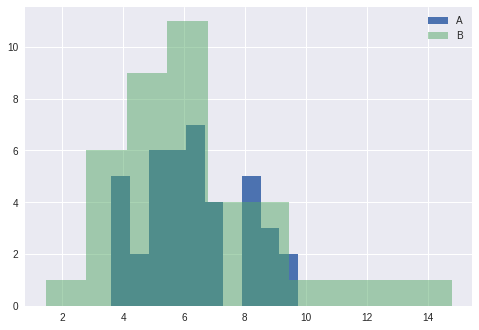

In [62]:
plt.hist(durations[::2],label='rate A')
plt.hist(durations[1::2],alpha = 0.5,label='rate B')
plt.legend()

In [63]:
print('mean of rate A: ',np.mean(durations[::2]))
print('mean of rate B: ',np.mean(durations[1::2]))

mean of A:  6.342500000000004
mean of B:  6.311025641025637


####(6)

In [0]:
def f_moreno_bote_6(Y, t):
    g_A = 0.05
    g_B = 0.05
    alpha = 0.75
    beta = 0.5
    gamma = 0.
    phi = 0.5
    tau = 0.01
    tau_a = 2
    tau_b = 2
    tau_s = 0.1
    sigma = 0.03
    eta = 0.5
    theta = 0.1 
    k = 0.05
    
    r_A, r_B, alpha_A, alpha_B, n_A, n_B = Y
    r_p = r_pool(r_A, r_B)
    
    Y_2 = np.array([
        (1/tau) * (-r_A + sigmoid(alpha * r_A  - beta * r_inh(r_p, r_A) + g_A - alpha_A + n_A)),
        (1/tau) * (-r_B + sigmoid(alpha * r_B  - beta * r_inh(r_p, r_B) + g_B - alpha_B + n_B)), 
        (1/tau_a) * (-alpha_A + gamma * r_A),
        (1/tau_b) * (-alpha_B + gamma * r_B),
        (- n_A / tau_s),
        (- n_B / tau_s)   
        ])
    return Y_2
  
 


1.0 0.01


Text(0.5,1,'gamma = 0')

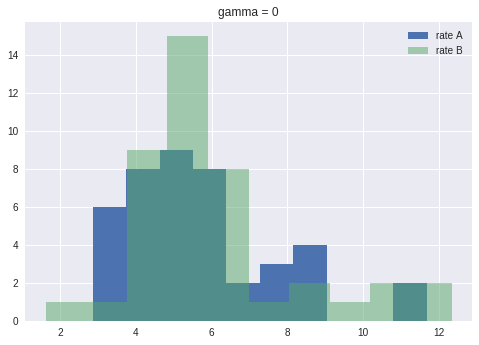

In [94]:
results_6 = euler_maruyama(f_moreno_bote, g_moreno_bote, y_0, t)
durations_6 = dominance_durations(results_6[0,:], results_6[1,:], t)
print(results_6[0,0],results_6[1,0])
plt.hist(durations_6[::2],label='rate A')
plt.hist(durations_6[1::2],alpha = 0.5,label='rate B')
plt.legend()
plt.title('gamma = 0')

In [95]:
print('mean of rate A: ',np.mean(durations_6[::2]))
print('mean of rate B: ',np.mean(durations_6[1::2]))

mean of rate A:  5.730476190476189
mean of rate B:  6.091666666666668
